## What is the Superior Streaming Service?
#### By Charlotte Ramiro and Gibson Njine
The purpose of this project is to help people who are struggling to choose between streaming services to find the one that is best suited to them. What genre do you like? Are you a student? What price are you willing to pay? These are all factors that we are going to explore in our project in order to provide an answer that is customized to the user's preferences.

The project utilises the [Watchmode API](https://api.watchmode.com/docs/#title-sources) which is one of the most complete APIs for finding out what movies & shows are available on each streaming service. In this project we will be using a number of end points from the Watchmode API service:
* We will use the `list_title` api endpoint to get the title ids of all movies in the (Netflix,Hbo,Amazon,Hulu,Disney+) streaming services
* We will then use the `title` api endpoint to get the details of all the movies we got in step one.Step one is pivotal because it provides us with the ids of movies which we use in this step
* We will then combine all the movies from all the 5 streaming services into one file `movie_details_list.txt` while appending every movie with a key of its `source`
* We will then use genres to analyse  which streaming services have the best rated movies in
   
We will then analyze and visualize this data in a way that will help us to show which streaming service is the best for its user.

The code below is useful to ensure that you are running the most updated version of the code. Please run it before continuing through the essay.

In [ ]:
%load_ext autoreload
%autoreload 2

# Data Collection Methods
### Step 1: Fetching ID's From Title List API
Our first step will be fetching title IDs from various streaming services and storing the data in text files. We will get IDs from the 5 most well-known services (Netflix,HBO,Amazon,Hulu,Disney+). This is partially due to the APIs rate limiting (further explained in Step 2), but is also due to the fact that these five services dominate the streaming industry and are generally known by everyone. To start off and make any API calls create a new API key [watchmode](https://api.watchmode.com/)

By the end of this step we will have 5 files, each having titles from all the 5 mentioned streaming services. To achieve this we will use two functions.The `fetch_and_write_title_ids_to_file` which writes data from the Titles API on files. It calls the `fetch_list_title_data` function which then makes a call to the Watchmode API service. Once we get the data, we then store it in files using the `fetch_and_write_title_ids_to_file` function. The `fetch_and_write_title_ids_to_file` takes in two parameters- the name of the streaming service and the name of the file to which we are writing the data from that source.

In [ ]:
from api import fetch_list_title_data, fetch_and_write_title_ids_to_file

#insert your generated API key here
api_key = ""

fetch_and_write_title_ids_to_file("Netflix", "netflix.txt",api_key)
fetch_and_write_title_ids_to_file("HBO MAX", "hbomax.txt",api_key)
fetch_and_write_title_ids_to_file("Disney+", "disney.txt",api_key)
fetch_and_write_title_ids_to_file("Hulu", "hulu.txt",api_key)
fetch_and_write_title_ids_to_file("Amazon Prime", "amazon.txt",api_key)

### Output
While the function doesn't return anything, running it for all five sources we create the files `netflix.txt`, `hbomax.txt`,`amazon.txt`,`hulu.txt`,`disney.txt` 

### Step 2: Getting Title Details

Our second step will involve getting the details of of every movie we fetched in our first step.We will use the `fetch_title_details` function. By iterating over the five files we got in our first step, we got the list of the first 200 movies from each source.The reason we choose 200 movies is because of the limitations of the the Watchmode API service. It allows 1000 requests per month from a single API key. With that in mind, we need to interate over the five files, get the title id, and then use the  Watchmode `Title` API to get the details of the title. We do 1000 iterations over the whole process and thus exhaust our api key's requests. Please be aware of the limitation of the API key,only 1000 requests can be sent per month and thus if you get an error message "HTTP Error 402: Over Quota",it means you have exhausted your quota and need to create another key.

This function needs two API keys to work since the Watchmode API limits how many requests you can make in a minute. Therefore, by cycling through two keys, we can bypass this and make sure it runs without errors. You can get a second API key with an alternate email adress, or, if you have only one email, you can use a temporary email provider such as [Temp Mail](https://temp-mail.org/en/).

In [ ]:
from api import save_title_details_data,fetch_title_details
api_key1 = ""
api_key2 = ""

save_title_details_data("amazon.txt","Amazon Prime", "amazontitles1.txt",api_key1, api_key2)
save_title_details_data("disney.txt","Disney+", "disneytitles.txt",api_key1, api_key2)
save_title_details_data("hulu.txt","Hulu", "hulutitles.txt",api_key, api_key2)
save_title_details_data("netflix.txt","Netflix", "netflixtitles.txt",api_key, api_key2)
save_title_details_data("hbomax.txt","HBO MAX", "hbomaxtitles.txt",api_key, api_key2)

### Output
Running the above functions results in 5 files `netflixtitles.txt`, `amazontitles.txt`,`hbomaxtitles.txt`,`hulutitles`,`disneytitles.txt`

### Step 3: Combining Data
Our third step will involve combining data from all the five texts files created in step two. We will combine all the data into one text file `movie_details_list.txt`, which we will use in our data analysis and plotting.

In [9]:
from api import merge_files

merge_files(["disneytitles.txt","amazontitles.txt",
            "netflixtitles.txt",
            "hbomaxtitles.txt",
            "hulutitles.txt"],
            "movie_details_list.txt" )


disneytitles.txt
amazontitles.txt
netflixtitles.txt
hbomaxtitles.txt
hulutitles.txt


### Output
This results in one file containing data on all the titles from all the 5 sources.

# Results and Interpretation

Now that we have access to our data, it's time to apply it to our question- which streaming service is the best for you? We realized soon into our data analysis process that the answer to this question is not the same for everyone. For example, a person who is really into horror might not find the same value in a streaming service that would be great for an animation fan. Therefore, we decided to make our analysis customizable based on your favourite genre.

The first way in which we wanted to analyze the greatness of the streaming services is in how good their titles are. We did this by averaging the user ratings of titles within a genre, and then plotting them alongside each other. 

In the following code block, we created a function `get_genre_ratings`that will return the average rating for a specific genre within a specific streaming service. Running the code block will return this value as well as generate a graph (using the `bar_plot_genre_ratings` function) that compares the average user ratings of movies within the input genre across the top 5 streaming services. This makes it easy to personalize the data for your own priorities. 

No Animation movies found in Disney Plus


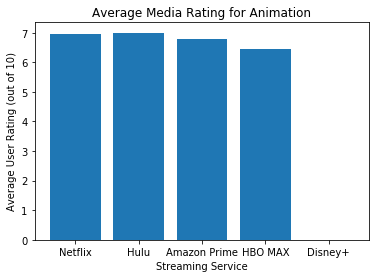

No Animation movies found in Disney Plus
{'Disney+': 0, 'Netflix': 6.95, 'Hulu': 7.0}


In [10]:
import api

api.bar_plot_genre_ratings("Animation")
animation_top_3 = {
    "Disney+" : api.get_genre_ratings("Animation", "Disney Plus"),
    "Netflix" : api.get_genre_ratings("Animation", "Netflix"),
    "Hulu" : api.get_genre_ratings("Animation", "Hulu")
    }
print(animation_top_3)

The function `bar_plot_genre_ratings` For example, I tend to like action movies the most, so I searched for the streaming service that has the best action movies. The graph shows that Disney Plus tends to have better action media than the rest of the streaming services (which makes sense, given that they own Marvel and Star Wars). However, for a horror fan, Disney Plus would fall short, as they have no horror movies at all. For the animation category, the graph shows that Netflix, Hulu, and Disney+ have very similar ratings, so I ran `get_genre_ratings` for the three services in order to see which is actually best and by how much.

Feel free to experiment with different genres with the above function to see which streaming service is best for your favourite genre. To see the list of valid genres, run the following code block:

In [ ]:
api.genres_list()

However, just the user ratings alone are not enough to accurately measure how good a streaming service is for that genre. Though this measures the quality of the movies in the service, it doesn't really say anything about the quantity. Thus, we made a function that would graph not only the ratings of the movies, but also how many movies of each genre each service has. After testing this function a few times, it seems like there is generally positive correlation between quantity and quality within a genre. Looking at the genre of Fantasy, however, can offer some insight as to why this function is helpful. 

Even though Netflix has the highest rating for the genre (albeit just by a little), it only offers 10 titles within the genre to watch. Disney Plus, however, has a slightly lower rating but over 50 titles in the genre. Therefore, though the quality alone may suggest that Netflix would be a better service for fantasy fans, Disney plus offers a lot more options for things to watch within the genre. 

It is important to note that this is where the limitations of our data become apparent. We only sampled 200 movies from each source, and, though they are supposed to be random, it is very likely that some genres do exist within a service but are not analyzed in our essay. For example, the Western genre shows that there are only one or two titles in each service, and the Anime genre shows zero titles in any of the services. Given that each service has thousands of films, it is very likely that some of these streaming services provide anime films and/or shows that were simply not analyzed due to the API's rate limiting.

With all of this in mind, we do feel as though 200 movies give a decent idea of which services have more of which movies. Though the numbers are inaccurate, the ratio still indicates which services have more selection. The function is also helpful in the case that we are able to call all of the data of the API (in future work), where it would become much more accurate.

In [ ]:
import api
api.scatter_plot_genre("Fantasy")

However, not all streaming services cost the same. If it comes down to two streaming services that have very similar quality and quanity of titles, usually it will be the price that sets them apart. Thus, we created a bubble plot in `bubble_plot_genre` where the size of the bubbles represents the price of the streaming service. You may notice that there is also an optional argument in this function, `student=True`. We decided to add this due to the fact that many services offer special deals for students (for example, the price of Hulu goes from \\$6 a month to \\$2). Hence, this is another way in which the results can be personalized based on one's individual situation.

This feature, however, does have a limitation. Though the non-student prices are generally accurate, some services have other deals. For example, Amazon Prime Video not only lowers its monthly price for students, but also gives them their first six months free. This isn't represented in the graph as there is no equivalent for other services, so it is worth looking into if your decision is mostly based on price.

In [ ]:
import api
api.bubble_plot_genre("Fantasy", student=True)

In the case of Fantasy, Netflix and Disney+ cost about the same per month (in fact, Disney+ is slightly cheaper), so it would make more sense for a fantasy fan to subscribe to Disney+. In some other situations, however, money can make the difference. 

Assume you're a student who is really into horror. HBO MAX has the highest rating films by quite a bit, while Amazon Prime and Hulu have more selection but lower ratings. Disney+ is out of the running since they have no horror titles at all, and Netflix seems to be below the other three candidates in both quantity and quality. Now, it seems like the competition is between Hulu and HBO MAX, since Amazon Prime is outdone by Hulu in both categories. Both Hulu and HBO seem to have similar value- but the price is what really sets them apart. A college student gets a large discount in Hulu, bringing its price down to \\$2 per month, while HBO MAX has no special student deals and is the most expensive service out of the five. Therefore, a horror-loving college student (a demographic which generally does not have a lot of extra money) would likely be better off getting a Hulu subscription.

Another way of visualizing these three categories is in a parallel coordinate graph, as seen in the code block below. The three vertical lines show where each service ranks in each of the three categories. Note that for visibility purposes, all of the data has been normalized, meaning that it lies on a scale of 0 to 1. However, since we are trying to compare the services to one another, the actual number of movies or specific rating is not necessary. If you do want to see the number of movies or specific rating, consult the above graphs. Generally, the ideal streaming service would be high up in the Number of Movies and Rating axes, but low on the Price axes. This method of visualization makes it easy to spot the best streaming service by seeing its position on the axes.

In [ ]:
import api
api.parallel_coordinate_plot("Fantasy", student=True)

## Next Steps

In conclusion, we've managed to visualize what the best streaming service for users with specific genre preferences would be. However, there are some extensions that could be done. The clearest and most important extension would be to get more data from the API. One way to do this would be to get funding to get their more premium plans, which allow 10,000-100,000 API calls per month (depending on the plan). Another potential way to do this would be to get around 20 API keys and cycle through them- this, however, would require a lot of fake emails, and though we did start this process, the time scope for our project was not enough to complete it. Another limitation that we could try to overcome in the future would be that of implementing other streaming services (as they might be undiscovered gems) as well as region-based analysis (given that we only analyzed data from within the US and streaming services offer different titles in different countries). Maps would be a good way to visualize this data.